Base: True
Epoch: True
Simulation: True
Simulation (q_table): True
Simulation (q_table): True
Q table: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-82350.0, -36405.0, -138330.0, -56467.5, -54135.0, -61120.5, -167925.0, -61005.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, -32940.0, -37200.0, -168060.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-143494.785, -108756.36630728772, -341955.0, -99667.67069430398, -98921.0056563653, -106858.69637495549, -165000.0, -151220.09999999998, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-68265.0, -41175.0, 0.0, -36030.0, 0.0, 0.0, -173325.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

/Users/niccolokadera/Importanti/Tesi/elfarolepidemic/model/person.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  general_weight = (1 - np.sum(par.people_memory_weight_arr)) / (len(self.person_memory) - len(par.people_memory_weight_arr))


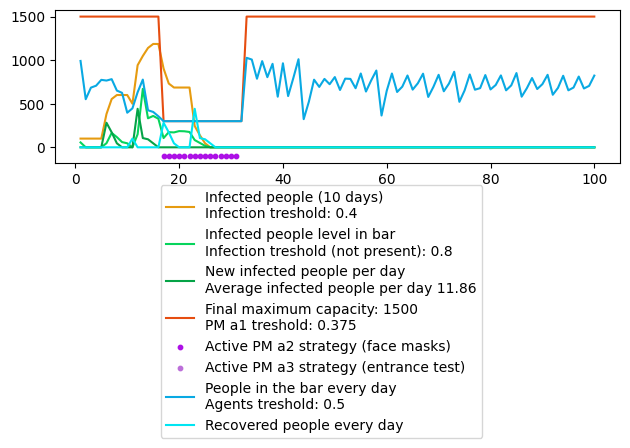

/Users/niccolokadera/Importanti/Tesi/elfarolepidemic/model/conclusion.py:113: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.0, hspace=10, right=0.7)


<Figure size 640x480 with 0 Axes>

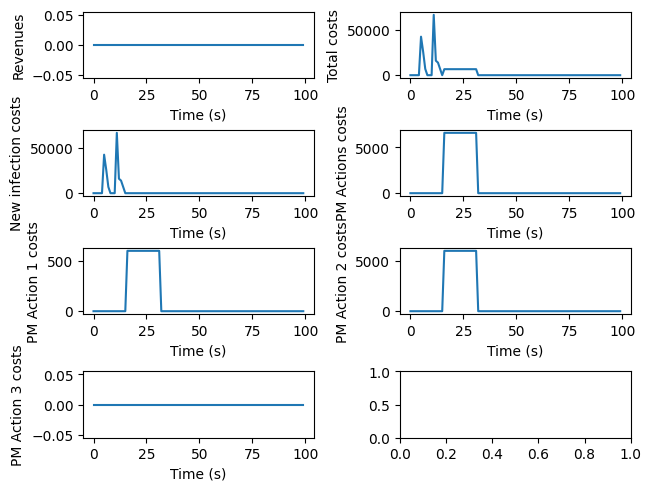




------- Day 1/100 -----------------------------------------------------------------------------


------- Day 2/100 -----------------------------------------------------------------------------


------- Day 3/100 -----------------------------------------------------------------------------


------- Day 4/100 -----------------------------------------------------------------------------


------- Day 5/100 -----------------------------------------------------------------------------


------- Day 6/100 -----------------------------------------------------------------------------


------- Day 7/100 -----------------------------------------------------------------------------


------- Day 8/100 -----------------------------------------------------------------------------


------- Day 9/100 -----------------------------------------------------------------------------


------- Day 10/100 -----------------------------------------------------------------------------


------- Day 11/1

<Figure size 640x480 with 0 Axes>

In [6]:
import json
import os
from model.MODEL import model
from model.parameters import parameters as par


# base_f = 'Analisi sensibilità/Analisi 1/Salvataggi/a2_cost/Con previsione seed 2008 res_type 3'
# base_f = 'Analisi sensibilità/Analisi 1/Salvataggi/a2_cost/prova'
base_f = 'Analisi sensibilità/Finale/default'


name_of_parameter = 'epoch'
cost_of_parameter = ''
iteration_n = 1
simulation_n = 99

epoch_folder = f'{base_f}/{name_of_parameter}_{cost_of_parameter}_{iteration_n}'
simulation_folder = f'{epoch_folder}/simulation_data/{simulation_n}'

print(f'Base: {os.path.exists(base_f)}')
print(f'Epoch: {os.path.exists(epoch_folder)}')
print(f'Simulation: {os.path.exists(simulation_folder)}')

with open(f'{simulation_folder}/parameters.json') as jsonfile:
    parameters = json.load(jsonfile)


if simulation_n > 1:
    simulation_folder_q_table = f'{epoch_folder}/simulation_data/{simulation_n - 1}'
    print(f'Simulation (q_table): {os.path.exists(simulation_folder_q_table)}')
    with open(f'{simulation_folder_q_table}/current_q_table.json') as jsonfile:
        q_table_pre = json.load(jsonfile)

    print(f'Simulation (q_table): {os.path.exists(simulation_folder)}')
    with open(f'{simulation_folder}/current_q_table.json') as jsonfile:
        q_table_pre_wrong = json.load(jsonfile)

    q_table = q_table_pre['q-table']
else:
    q_table = 0


print(f'Q table: {q_table}')

m = model(int(parameters['seed']))

new_par = par()
new_par.__dict__.update(parameters)
print(new_par.__dict__['epsilon_RL'])

new_par.draw_conclusions = True
new_par.save_conclusions = False
new_par.save_chart = False
new_par.save_csv = False
new_par.save_q_table = False
new_par.save_duplicate_q_table = False
new_par.stat_from_stored_q_table = False

for key, el in new_par.__dict__.items():
    if el != m.par.__dict__[key]:
        print(f'Parameter is different: {key} {m.par.__dict__[key]} -> {el}')

m.par = new_par

if q_table != 0:
    for r, row in enumerate(m.gv.q_table):
        for c, el in enumerate(row):
            m.gv.q_table[r][c] = q_table[r][c]
    print(m.gv.q_table)



m.run(parameters['seed'])

print(m.gv.txt_output)

